# Finite differences

Finite differences are a method to discretise otherwise continuous differential operators. In applied mathematics, discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts. This process is usually carried out as a first step toward making them suitable for numerical evaluation and implementation on digital computers. 

Consider the following $n$-th derivative 

$$ f^{(n)}(x) = \frac{\mathrm{d}^n f}{\mathrm{d}x^n} $$

of the continuous function $f(x) : x \in \mathcal{R} \rightarrow \mathcal{R}$. From the mathematical point of view, the operation of computing the $n$-th derivative is a linear operator (or mapping) that takes a function $f(x)$ and returns the function $f^{(n)}(x)$, which is its derivative. We indicate this operator with ${\mathrm{d}^n } / {\mathrm{d}x^n}$. Derivatives appear in most differential equations that describe various laws of nature, such as the governing equations of fluid mechanics. 

This script describes how to discretise the derivative operator ${\mathrm{d}^n } / {\mathrm{d}x^n}$ via finite differences. The result will be a matrix $\mathbf{D}^{(n)}$ which, when applied to a vector $\vec{f}$ of discrete function values as $\mathbf{D}^{(n)} \vec{f}$, returns the $n$-th derivative $\vec{f}^{(n)}$. In other words 

$$ \vec{f}^{(n)} = \mathbf{D}^{(n)} \vec{f} $$


The discretisation via finite differences consists of the following steps:

1. Discretisation of the domain

2. Discretisation of the derivative

In the following, we take as example the real function 

$$ f(x) = x^4 + 2 $$

defined on the domain $x \in [0, L]$ and consider its first two derivatives

$$ f(x)^i = 4x^3 $$

$$ f(x)^{ii}= 12x^2 $$

Our object is to compute the same derivatives numerically and compare the results against the known analytical solution.


### 1. Discretisation of domain

This is the easiest step. The infinite (continuous) set $\mathcal{R}$ of real number $x \in [0, L]$ has to be discretised into $N$ discrete points equidistantly spaced onver the range $[0, L]$. This is achieved in Python as follows


In [1]:
# Some preliminary operations: let's import useful modules

import numpy as np                          # module for matrix operations
from matplotlib import pyplot as plt        # module for plotting, the decorator in the following line makes the plots
                                            # appear directly into the notebook instead of an external window
%matplotlib notebook

In [2]:
# Define the discretised domain

L = 1.0    # Length of the domain [0:L]
N = 20    # Number of nodes 
 
x = np.linspace(0, L, num=N)  # The domain x

<IPython.core.display.Javascript object>


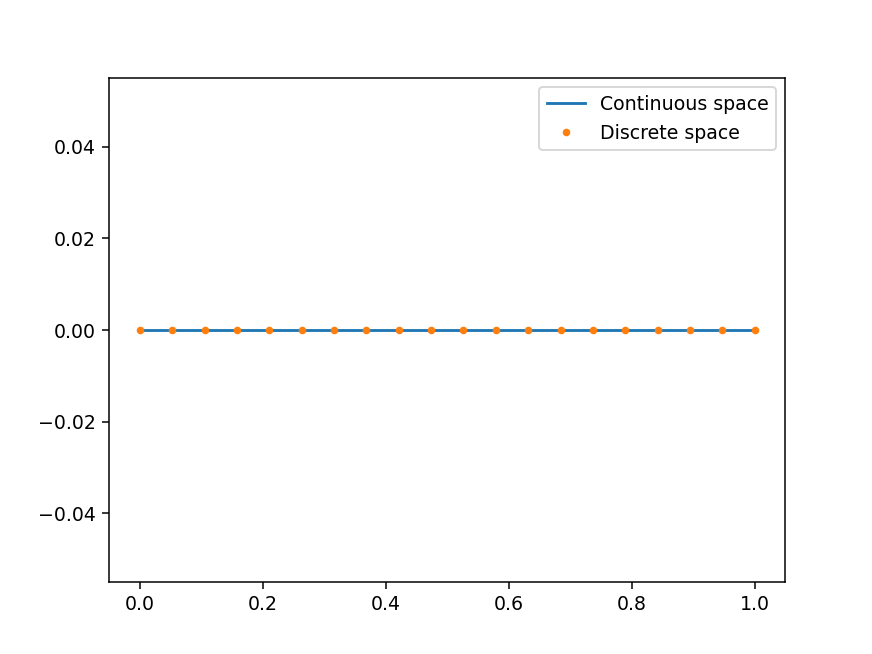

In [3]:
# Plot the discretisation
plt.figure()
plt.plot(x,np.zeros(x.shape), label='Continuous space')
plt.plot(x,np.zeros(x.shape),'.', label='Discrete space')
plt.legend()

We now indicate the discrete $i$-th point of the domain as 

$$x_i = (i-1)\frac{L}{N-1} \qquad \text{with}  \qquad i = 1,2,.\!.\!.,N $$

We can also order all the points $x_i$ into a column vector 

$$\vec{x} = \begin{pmatrix}
x_1 \\
x_2 \\
... \\
x_{i-1} \\
x_{i} \\
x_{i+1} \\
... \\
x_{N}
\end{pmatrix}$$

The discretisation does not need to be equidistant, here an example of a non equidistant grid. The hyperbolic tangent function `np.tanh` is used for its definition. This is just an example: other nonequidistant grids are possible!

In [4]:
# Define the discretised domain onto a non-equdistant grid

L = 1.0    # Length of the domain [0:L]
N = 20     # Number of nodes 
a = 2    # The larger, the more refined the grid is at the borders
 
x_noneq = (np.tanh(a*(2*np.arange(N)/(N-1)-1))/np.tanh(a)+1)

<IPython.core.display.Javascript object>


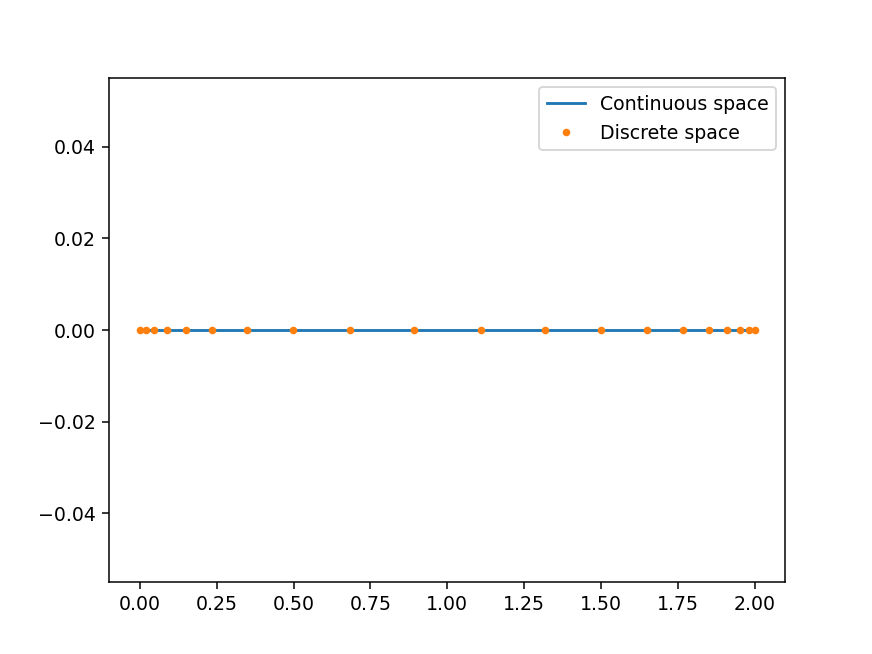

In [5]:
# Plot the discretisation
plt.figure()
plt.plot(x_noneq,np.zeros(x_noneq.shape), label='Continuous space')
plt.plot(x_noneq,np.zeros(x_noneq.shape),'.', label='Discrete space')
plt.legend()

### 2. Discretisation of the derivative

Once the domain $x$ is discretised into discrete points $x_i$, our function $f$ can also be discretised into discrete values 

$$f_i = f(x_i) \, ,$$

which can be also collected into the array 

$$\vec{f} = \begin{pmatrix}
f_1 \\
f_2 \\
... \\
f_{i-1} \\
f_{i} \\
f_{i+1} \\
... \\
f_{N}
\end{pmatrix}$$

In this way, the originally continous set of coordinates $x$ and function $f$ have been transformed into a discrete set of points $\vec{x}$ and function values $\vec{f}$.

Now, finite differences aim at transforming the continuous operator ${\mathrm{d}^n } / {\mathrm{d}x^n}$ into the discrete operator $\mathbf{D}^{(n)}$ and thus obtain the $n$-th derivative of $\vec{f}$ as $\vec{f}^{(n)}=\mathbf{D}^{(n)}\vec{f}$. The idea behind finite differences is rather simple. We seek to compute the value of the $n$-th derivative $f^{(n)}_i$ at the point $x_i$ as a linear combination (weigthed sum) of the known function values $\vec{f}$. If we write this mathematically, we obtain

$$ f^{(n)}_i = \sum_{j=1}^N \alpha_{i,j} \,\,f_j  = \mathbf{D}^{(n)}\vec{f}$$

where $\alpha_{i,j}$ are unknown coeffients of the matrix $\mathbf{D}^{(n)}$, which only depend on the grid. If the grid is equidistant, the coefficients do not depend on the particular position $x_i$ under consideration.




From a phenomenological standpoint, it is sound to assume that the derivative $f^{(n)}_i$ at $x_i$ depends on the function values at $x_i$ and at few additional neighbouring points only. In this way, function values at points "far away" from $x_i$ are not considered to build the derivative. Typically only $p$ neighbours at each side of $x_i$ are considered, so that the definition of the discrete derivative becomes. 

$$ f^{(n)}_i = \sum_{j=i-p}^{i+p} \alpha_{i,j} \,\,f_j  \qquad  \textsf{(Eq.1)}$$ 

This simplification is not only physically sound but has the beneficial side effect that the discrete operator $\mathbf{D}^{(n)}$ is a $(2p+1)$-diagonal matrix, as we will discuss later. The number of neighbouts at the two sides of $x_i$ does not need to be symmetric. 

Now, the missing piece of the puzzle is how to find the coefficient $\alpha_{i,j}$ that actually yield the desired derivative. This can be easily achieved via Taylor expansions. The procedure is to substitute to each $f_j$ at the right-hand side of (Eq.1) its Taylor expansion about the point $x_i$, i.e. 

$$ f_j = f_i + \left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i}(x_j - x_i) 
             + \frac{1}{2}\left.\frac{\mathrm{d}^2 f}{\mathrm{d} x^2}\right|_{i}(x_j - x_i)^2 
             + \frac{1}{6}\left.\frac{\mathrm{d}^3 f}{\mathrm{d} x^3}\right|_{i}(x_j - x_i)^3 
             + \mathcal{O}((x_j - x_i)^4) $$

Now, let us assume that we want to compute the 1$^\textsf{st}$ derivative using $p=1$ neighbours at each side of the point $x_i$, thus involving a total of three points. In this case we say that the differentiation stencil has a size three.  (Eq.1) for this specific case reads

$$ f^{\prime}_i = \sum_{j=i-1}^{i+1} \alpha_{i,j} \,\,f_j $$ 

or, in other words:

$$ f^{\prime}_i = \alpha_{i,\,i-1} \,\,f_{i-1} + \alpha_{i,\,i} \,\,f_{i} + \alpha_{i,\,i+1} \,\,f_{i+1}  \qquad  \textsf{(Eq.2)}$$ 

We can write the Taylor expansion of $f_{i-1}$, $f_{i}$ and $f_{i+1}$ as :

$ f_{i-1} = f_i + \left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i}(x_{i-1} - x_i) 
             + \frac{1}{2}\left.\frac{\mathrm{d}^2 f}{\mathrm{d} x^2}\right|_{i}(x_{i-1} - x_i)^2 
             + \frac{1}{6}\left.\frac{\mathrm{d}^3 f}{\mathrm{d} x^3}\right|_{i}(x_{i-1} - x_i)^3 
             + \mathcal{O}((x_{i-1} - x_i)^4) $
             
$ f_i = f_i $

$ f_{i+1} = f_i + \left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i}(x_{i+1} - x_i) 
             + \frac{1}{2}\left.\frac{\mathrm{d}^2 f}{\mathrm{d} x^2}\right|_{i}(x_{i+1} - x_i)^2 
             + \frac{1}{6}\left.\frac{\mathrm{d}^3 f}{\mathrm{d} x^3}\right|_{i}(x_{i+1} - x_i)^3 
             + \mathcal{O}((x_{i+1} - x_i)^4) $

If we insert the Taylor expansions into (Eq. 2) we obtain

$$ 
\begin{split}
f^{\prime}_i  & =  & \alpha_{i,i-1}\left[f_i + \left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i}(x_{i-1} - x_i) 
             + \frac{1}{2}\left.\frac{\mathrm{d}^2 f}{\mathrm{d} x^2}\right|_{i}(x_{i-1} - x_i)^2 
             + \frac{1}{6}\left.\frac{\mathrm{d}^3 f}{\mathrm{d} x^3}\right|_{i}(x_{i-1} - x_i)^3 
              \right] \\
              & +  & \alpha_{i,i}f_i \\
              & +  & \alpha_{i,i+1}\left[f_i + \left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i}(x_{i+1} - x_i) 
             + \frac{1}{2}\left.\frac{\mathrm{d}^2 f}{\mathrm{d} x^2}\right|_{i}(x_{i+1} - x_i)^2 
             + \frac{1}{6}\left.\frac{\mathrm{d}^3 f}{\mathrm{d} x^3}\right|_{i}(x_{i+1} - x_i)^3 
              \right] \\
             &  +  & \mathcal{O}(\max\{\alpha_{i,i-1}(x_{i-1} - x_i),\alpha_{i,i+1}(x_{i+1} - x_i)\}^4)  \qquad \qquad \textsf{(Eq.3)}
\end{split}
$$

The three unkown coeffients $\alpha$ can be found by imposing the following conditions:

1. All terms containing the first derivative sum to exactly the first derivative itself
2. As long as we have remaining coefficients, the sum of the remaining terms with the same order is set to zero. We do so by starting from the leading-order terms. 

In this way, we are imposing that the sum of the function values actually results in the desired derivative. So let us try to apply the steps above. 

Step 1 yields the equation

$$ \alpha_{i,i-1}\left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i}(x_{i-1} - x_i) + 
   \alpha_{i,i+1}\left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i}(x_{i+1} - x_i) = \left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i} \, ,$$

which can be divided by $\left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{i}$ to obatin

$$ \alpha_{i,i-1}(x_{i-1} - x_i) + 
   \alpha_{i,i+1}(x_{i+1} - x_i) = 1 $$
 
Step 2 yields to two further equations. If we set to zero all terms contaning $f_i$ (zeroth
order), we obtain (equation already divided by $f_i$, which appears in all terms):

$$ \alpha_{i,i-1} + \alpha_{i,i} + \alpha_{i,i+1} = 0 $$

If we set to zero all terms containing $\left.{\mathrm{d}^2 f}/{\mathrm{d} x^2}\right|_{i}$ (second order), we obtain (equation already divided by $\frac{1}{2}\left.\frac{\mathrm{d}^2 f}{\mathrm{d} x^2}\right|_{i}$):

$$ \alpha_{i,i-1}(x_{i-1} - x_i)^2 + 
   \alpha_{i,i+1}(x_{i+1} - x_i)^2 = 0 $$
   
Now we have three equations in the three unknown coefficients $\alpha_{i,i-1}$, $\alpha_{i,i}$ and $\alpha_{i,i+1}$. This can be recast into the following $3 \times 3$ linear system

$$\begin{bmatrix}
        1                 & 1 & 1                 \\
        (x_{i-1} - x_i)   & 0 & (x_{i+1} - x_i)   \\
        (x_{i-1} - x_i)^2 & 0 & (x_{i+1} - x_i)^2 
    \end{bmatrix} 
    \begin{bmatrix}
        \alpha_{i,i-1}   \\
        \alpha_{i,i}   \\
        \alpha_{i,i+1} 
    \end{bmatrix} 
    = 
    \begin{bmatrix}
        0   \\
        1   \\
        0 
    \end{bmatrix} 
    $$ 
 
Thus, for a generic nonequidistant grid with $N$ gridpoints, one needs to solve $N$  of such $3 \times 3$ linear systems (one for each grid point), in order to find the coefficients of the matrix $\mathbf{D}^{(1)}$. For an equidistant grid, $(x_{i-1} - x_i)$ and $(x_{i+1} - x_i)$ are equal at all gridpoints $i$ and, in particular, read

$$ (x_{i-1} - x_i) = -\Delta x $$
$$ (x_{i+1} - x_i) = \Delta x $$

where $\Delta x = L/(N-1)$ is the constant grid spacing. Thus, in this particular case only one $3\times 3$ system is sufficient to find the finite difference coefficients. The sytem above for an equdistant grid reads 

$$\begin{bmatrix}
        1                 & 1 & 1                 \\
        -\Delta x   & 0 & \Delta x   \\
        \Delta x^2 & 0 & \Delta x^2 
    \end{bmatrix} 
    \begin{bmatrix}
        \alpha_{i-1}   \\
        \alpha_{i}   \\
        \alpha_{i+1} 
    \end{bmatrix} 
    = 
    \begin{bmatrix}
        0   \\
        1   \\
        0 
    \end{bmatrix} 
    $$ 

where the first subscript of the coefficient $\alpha$ has been dropped. The solution to this system is as follows (try to solve it yourself!):

$$ \alpha_{i-1} = - \frac{1}{2 \Delta x} $$
$$ \alpha_i = 0 $$ 
$$ \alpha_{i+1} =  \frac{1}{2 \Delta x} $$

If we plug this coefficients into (Eq.3) for an equidistant grid we obtain the expression of the first derivative (try to do it yourself!!) with finite differences:

$$ f_i^\prime = \frac{f_{i+1} - f_{i-1}}{2 \Delta x} + \mathcal{O}(\Delta x^2)$$ 

These is the the so-called second-order central finite difference approximation of the first derivative. It is second-order because the truncation error  $\mathcal{O}(\Delta x^2)$ decreases as the square of the grid spacing. In this case, we say that the order of accuracy is 2. It is central because the number of neighbours involved in the computation of the derivative is symmetric with respect to $x_i$. 

Now we can finally compute the discrete finite-difference operator $\mathbf{D}^{(1)}$ numerically, for an equidistant grid.

...
...
... wait! 

We realise that for computing the derivative at the first ot last gridpoint we would need a function value outside the discrete domain! At the moment, we will just solve this problem by not computing the derivative at the boundaries of the domain. 


<IPython.core.display.Javascript object>


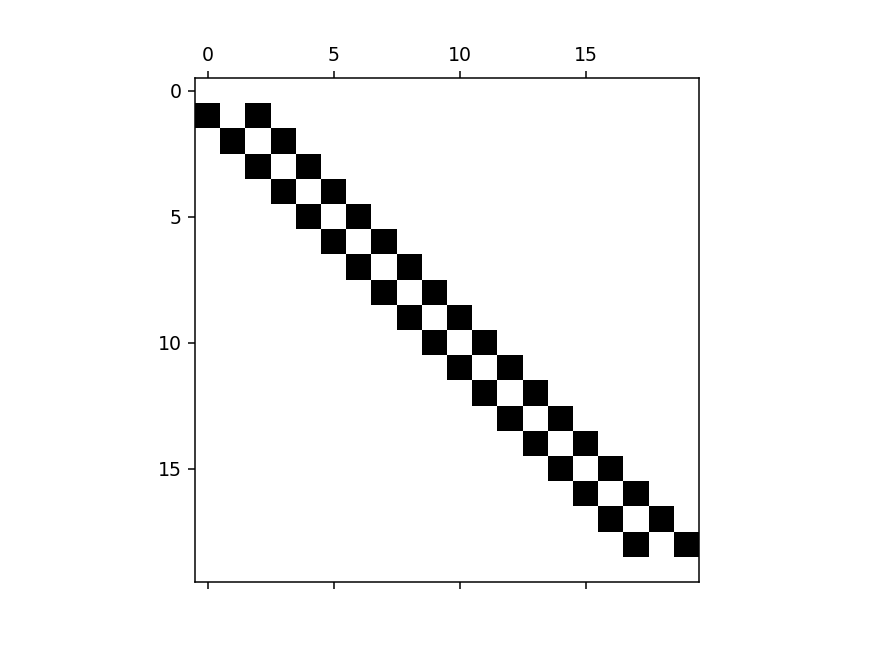

In [6]:
# Define the grid spacing
dx = L/(N-1)

# Compute the difference coefficients 
a_im1 = -1/(2*dx)                           # a_{i-1} = aim1
a_i   =  0
a_ip1 =  1/(2*dx)                           # a_{i+1} = aip1

# Create the matrix D1
# the i-th row in the matrix is the equation that compute the derivative at the position x_i
# the j-th column in the matrix multiplies the function value f_j in the i-th equation
D1 = np.zeros([N,N])
for i in range(1,N-1): # Skip the endpoints (see text above)! 
    D1[i,i-1] = a_im1
    D1[i,i] = a_i
    D1[i,i+1] = a_ip1
    
# Let's have a look at the matrix: we plot the nonzero values in the matrix
plt.figure()
plt.spy(D1)

Now we are ready to compute the discrete first derivative as $\vec{f^\prime} = \mathbf{D}^{(1)} \vec{f}$ 

<IPython.core.display.Javascript object>


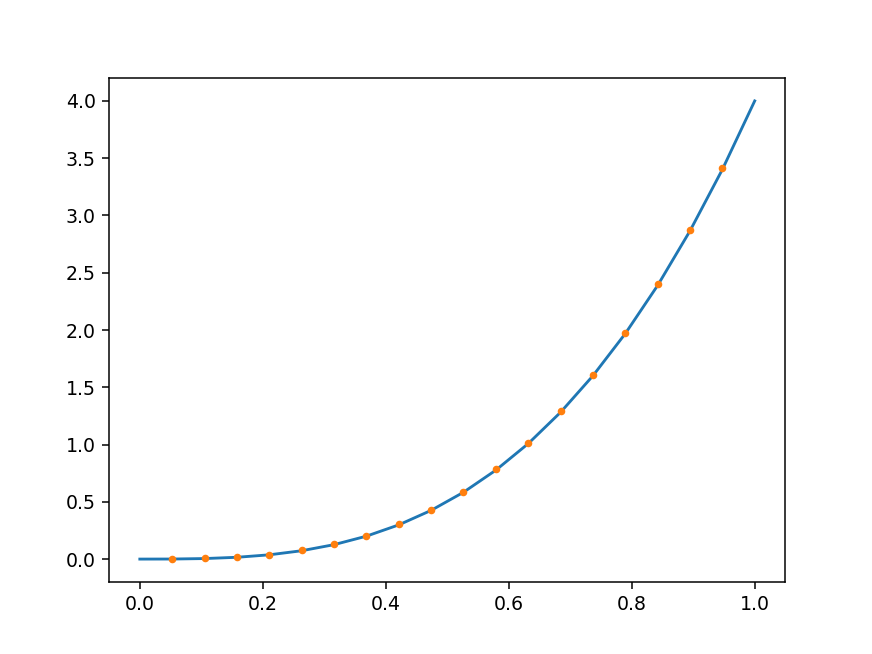

In [7]:
# Define the discrete function f = x^4 + 2 
f = x**4 + 2
df = D1.dot(f)
df_analytical = 4*x**3

# Plot the derivative and compare it with the analytical solution
plt.figure()
plt.plot(x, df_analytical)
plt.plot(x[1:N-1], df[1:N-1], '.')       # we do not plot the fist and last points,
                                         # which have not been computed

In [8]:
# Now we can compute how the error decreses with the grid spacing
N = np.asarray([10**1, 10**2, 10**3, 10**4])
err = np.zeros(N.shape)

for iN in range(N.size):
    # Define the discretised domain
    L = 1.0    # Length of the domain [0:L] 
    dx = L/(N[iN]-1)
    x = np.linspace(0, L, num=N[iN]).reshape([N[iN],1])  # The domain x
    # Compute the difference coefficients 
    a_im1 = -1/(2*dx)                           # a_{i-1} = aim1
    a_i   =  0
    a_ip1 =  1/(2*dx)                           # a_{i+1} = aip1
    # Create the matrix D1
    D1 = np.zeros([N[iN],N[iN]])
    for i in range(1,N[iN]-1): # Skip the endpoints (see text above)! 
        D1[i,i-1] = a_im1
        D1[i,i] = a_i
        D1[i,i+1] = a_ip1
    # Define the discrete function and compute the derivatives
    f = x**4 + 2
    df = D1.dot(f)
    df_analytical = 4*x**3
    # Compute the error
    err[iN] = np.mean(np.sqrt((df[1:N[iN]-1]-df_analytical[1:N[iN]-1])**2))

<IPython.core.display.Javascript object>


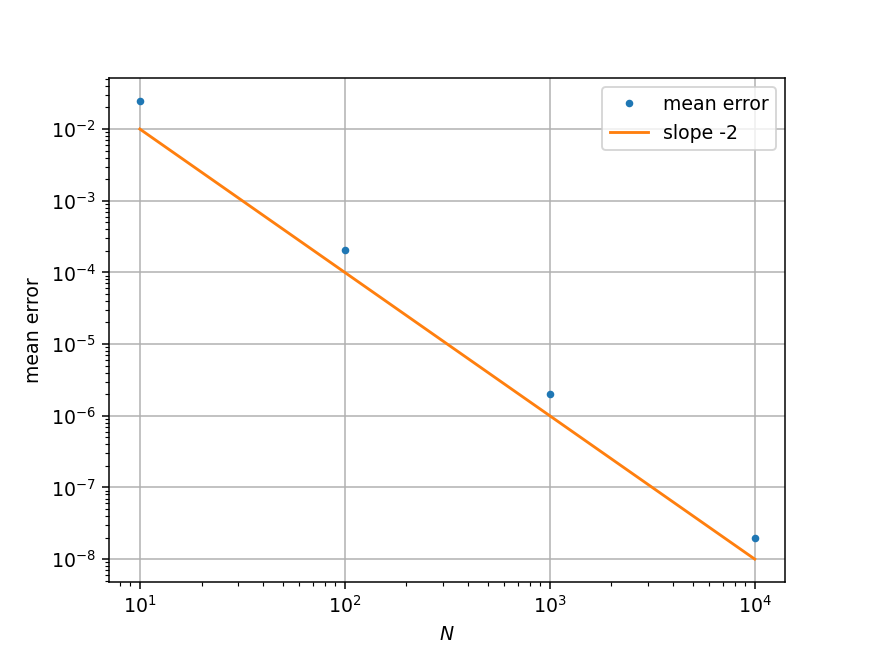

Text(0, 0.5, 'mean error')

In [9]:
# Plot the mean error as function of number of grid points
plt.figure()
plt.grid()
plt.loglog(N, err, '.', label='mean error')
plt.loglog(N, 1/N**2, label='slope -2')
plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'mean error')

The same can be done for the nonequidistant grid. Now, the finite difference coefficietns are different for every row in the matrix $\mathbf{D}^{(1)}$, i.e. they depend on the local grid spacing. Try to read the code and understand it utilising the theory that we explained above. 

<IPython.core.display.Javascript object>


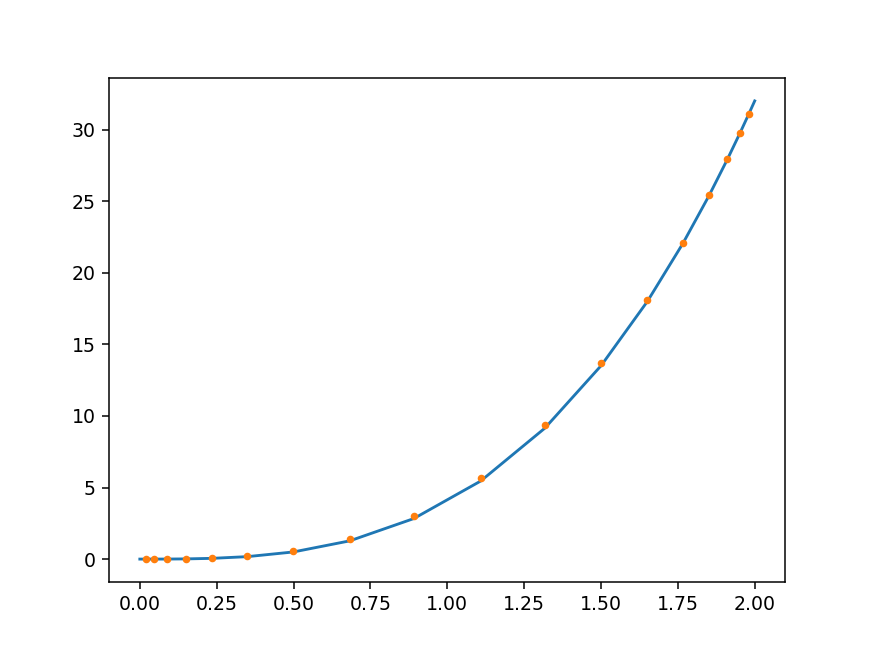

In [10]:
# Define the grid (again, we overwrote it in the last block!)
L = 1.0    # Length of the domain [0:L]
N = 20     # Number of nodes 
a = 2      # The larger, the more refined the grid is at the borders
x = (np.tanh(a*(2*np.arange(N)/(N-1)-1))/np.tanh(a)+1).reshape([N,1])

# Create the matrix D1
D1 = np.zeros([N,N])
for i in range(1,N-1): # Skip the endpoints (see text above)! 
        # We set up the linear system to find the finite-different coefficients
        M = np.zeros((3,3))
        M[0,0]=1.0;              M[0,1]=1.0; M[0,2]=1.0
        M[1,0]=x[i-1]-x[i];                  M[1,2]=x[i+1]-x[i]
        M[2,0]=(x[i-1]-x[i])**2;             M[2,2]=(x[i+1]-x[i])**2
        t = np.asarray([0, 1, 0]).reshape([3,1])
        # We find the coefficients 
        a = np.linalg.solve(M, t)
        # Put the coefficients into the D1 matrix
        D1[i,i-1] = a[0]
        D1[i,i] = a[1]
        D1[i,i+1] = a[2]
# Define the discrete function and compute the derivatives
f = x**4 + 2

# Compute the deivative
df = D1.dot(f)
df_analytical = 4*x**3

# Plot the derivative 
plt.figure()
plt.plot(x, df_analytical)
plt.plot(x[1:N-1], df[1:N-1], '.')       # we do not plot the fist and last points,
                                         # which have not been computed

### A function for generic finite differences

Here below we present a function that computes a generic opeartor $\mathbf{D}^{(n)}$ of a given order. With the knowledge, which you have gatherd so far you should be able to understand the function. In this case, we solve the problem of the derivative computation at the boundaries by taking a difference stencil which is not centered around the point $x_i$. Instead, we take an asymmetric number of point on the left and right side.

In [11]:
def setup_derivative(x,n,r):
    # This function returns the linear operator Dn
    # which computes the n-th derivative with a stencil of r points
    # for a generic one-dimensional grid "x"
    
    # Check that r is larger than n (otherwise we do not have enough coefficients)
    if r<n+1: 
        raise Exception("r must be larger than n")
    if r%2==0:
        raise Exception("r must be an odd integer number")
    # Get the number of points in the mesh
    N = x.size
    # initialize the operator
    Dn = np.zeros([N,N])
    # Compute the coefficients
    for i in range(N):
        # Define the matrices 
        M = np.zeros([r,r])
        t = np.zeros([r,1])
        # This defines the asymmetry of the stencil at the boundaries
        shift=(i<(r//2))*(r//2-i) - (i>(N-r//2-1))*(r//2+i-N+1)
        # Compute the r*r linear system required for the coefficients
        # the last row corresponds to the equation for the 0th-order of the Taylor expansion
        # the second last to the 1-st order 
        # the third last to the 2-nd orde, and so on...
        for ir in range(r):
            for ic in range(r):
                M[ir,ic] = (x[i-r//2+ic+shift]-x[i])**(r-1-ir)
        t[r-1-n] = np.math.factorial(n)
        # Compute the coefficients 
        a = np.linalg.solve(M, t)
        # Put the coefficients into the operator 
        Dn[i,i-r//2+shift:i+r//2+1+shift] = a.reshape([r])
    # Return the operator
    return Dn
    




Now we try to use the function we just wrote to compute the fourth derivative of our example function. We use a non-equidistant grid to stay generic.

<IPython.core.display.Javascript object>


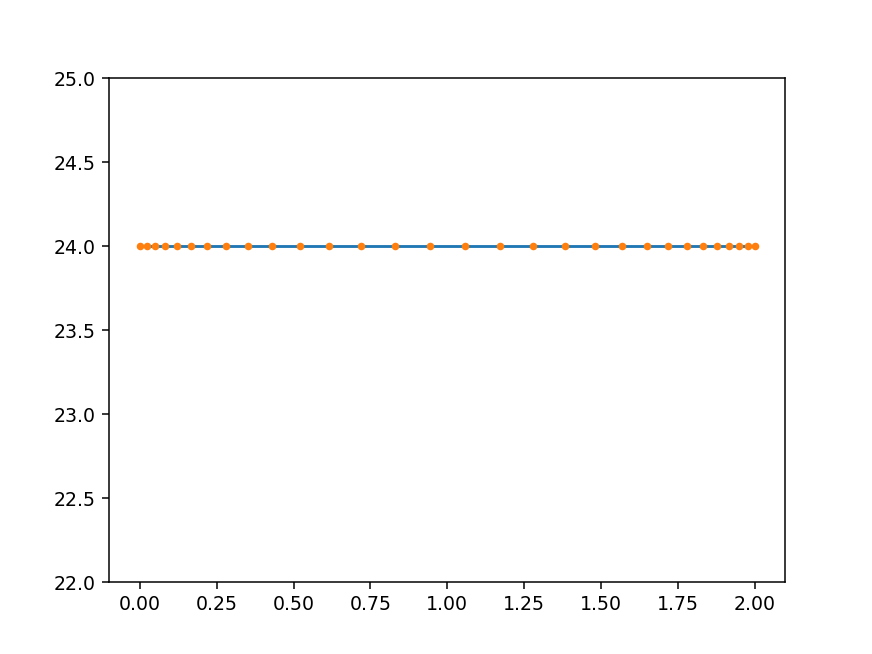

(22.0, 25.0)

In [12]:
# Define the grid (again, we overwrote it in the last block!)
L = 1.0    # Length of the domain [0:L]
N = 30     # Number of nodes 
a = 1.5      # The larger, the more refined the grid is at the borders
x = (np.tanh(a*(2*np.arange(N)/(N-1)-1))/np.tanh(a)+1).reshape([N,1])

# Define the discrete function
f = x**4 + 2
    
# Compute for instance the fourth derivative with a stencil of 5 points
D4 = setup_derivative(x,4,5)

# Compute the fourth derivative of the function f = x^4 + 2, which should be a constant
df = D4.dot(f)
df_analytical = 24*np.ones(x.shape)

# Plot the derivative 
plt.figure()
plt.plot(x, df_analytical)
plt.plot(x, df, '.')      
plt.ylim([22,25])


### Closing remarks

If you think of the theory explained above, we can state that:

1. If we want to compute the $n$-th derivative, we need at least a finite-different stencil of at least $n+1$ points.
2. The order of accuracy can be increased by increasing the number of points (thus finite-difference coefficients) in the stencil to $m > n+1$

Try to verify these statements by rading carefully the steps of the Taylor-exapansion which we discussed above.